# Data Mining Project: Spaceship  Titanic 

Welcome to the year 2912, where our data science skills are needed to solve a cosmic 
mystery. We have received a transmission from four light-years away, and things aren't 
looking good. The Spaceship Titanic was an interstellar passenger liner launched a 
month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage 
transporting emigrants from our solar system to three newly habitable exoplanets orbiting 
nearby stars. While heading towards its first destination, the scorching 55 Cancri E, the unsuspecting 
Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. 
Unfortunately, it met a fate similar to its namesake from 1000 years before. Although the ship 
remained intact, almost half of the passengers were transported to an alternate dimension!
With this challenge, we want to clusterize data in order to answers the question: “what sorts of 
people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
We want to analyze the data with a Python notebook to create clustering models and examine 
the received data. We will try to better understand the events that led to this cosmic situation 
and contribute to unraveling the mystery behind this space collision.
The goal is to determine which passenger has been Transported to another dimension or not.

We are going to develope the report in 3 chapters:

1) In the first chapter we will focus on the exploration of the dataset, the distribution of the different
   features and their relations. 

2) In the second one we will engage in feature engeneering, the filling of missing values and data preprocessing

3) In the third chapter we will perform clustering, and its validation with internal and external indexes. 
   Interpretation of the final results.
   

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

import seaborn as sns


# Chapter 1

Let's begin with the exploration of the datasets 

In [2]:
# Save to df
data = pd.read_csv('spaceship-titanic/train.csv')
label = data['Transported']

# Shape
print('Data shape:', data.shape)

Data shape: (8693, 14)


In [3]:
data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [4]:
#data.loc[data['HomePlanet']=='Europa', 'PassengerId']=3
#data.head()

The dataset is formed by 8693 entries, each one representing a passenger, and 14 different features. Some of which are categorical
and some numerical. teir interpretation is the following:

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


Since we want to perform unsupervised learning we do not want the label of the target, so we drop it. The coulmn 'Name' being a categorical feature specific for every entry could hardly be useful in any way during the process, so we drop it as well.

In [5]:
# remove Transported
data = data.drop(['Transported'], axis=1)

#remove Name
data = data.drop(['Name'], axis=1)

As a first step, for a better understanding, we divide the features in numerical and categorical.

In [6]:
num_features = []
cat_features = []

for i,f in enumerate(data.keys()):
    if data.dtypes[i] == 'float64':
        num_features.append(f)
    else:
        cat_features.append(f)


Here we create 2 lists with the name of categorical features and numerical features

In [7]:
num_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [8]:
cat_features

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

## Numerical features

In [9]:
data.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [10]:
data[num_features][:5]

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0  39.0          0.0        0.0           0.0     0.0     0.0
1  24.0        109.0        9.0          25.0   549.0    44.0
2  58.0         43.0     3576.0           0.0  6715.0    49.0
3  33.0          0.0     1283.0         371.0  3329.0   193.0
4  16.0        303.0       70.0         151.0   565.0     2.0

Let's now plot the distribution for every numerical feature.

### Age

<Axes: xlabel='Age', ylabel='Count'>

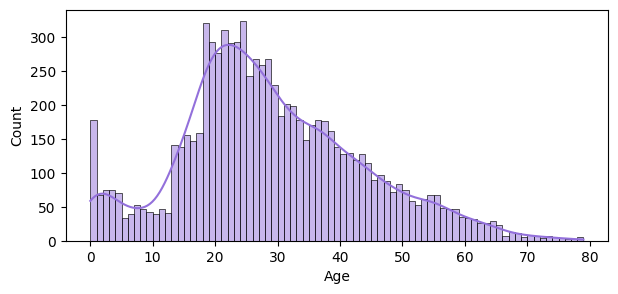

In [11]:
plt.figure(figsize = (7,3))
sns.histplot(data=data, x='Age', binwidth=1, kde=True, color='mediumpurple')

### RoomService

<Axes: xlabel='RoomService', ylabel='Count'>

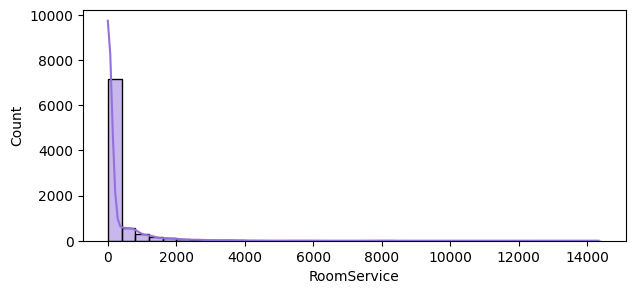

In [12]:
plt.figure(figsize = (7,3))
sns.histplot(data=data, x='RoomService', binwidth=400, kde=True, color='mediumpurple')

### FoodCourt

<Axes: xlabel='FoodCourt', ylabel='Count'>

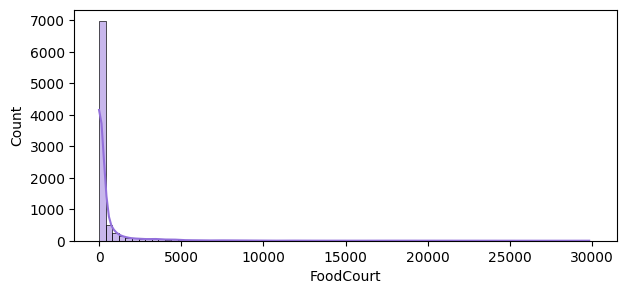

In [13]:
plt.figure(figsize = (7,3))
sns.histplot(data=data, x='FoodCourt', binwidth=400, kde=True, color='mediumpurple')

### ShoppingMall

<Axes: xlabel='ShoppingMall', ylabel='Count'>

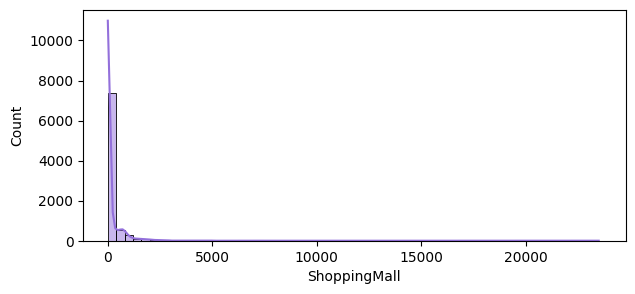

In [14]:
plt.figure(figsize = (7,3))
sns.histplot(data=data, x='ShoppingMall', binwidth=400, kde=True, color='mediumpurple')

### Spa 

<Axes: xlabel='Spa', ylabel='Count'>

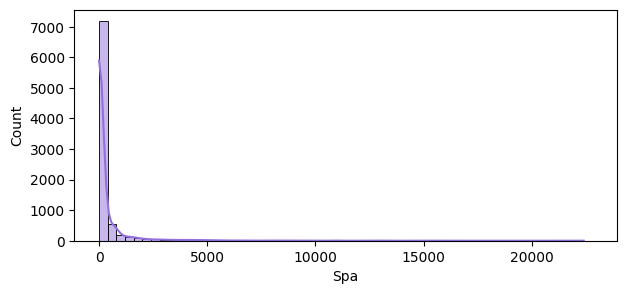

In [15]:
plt.figure(figsize = (7,3))
sns.histplot(data=data, x='Spa', binwidth=400, kde=True, color='mediumpurple')

### VRDeck

<Axes: xlabel='VRDeck', ylabel='Count'>

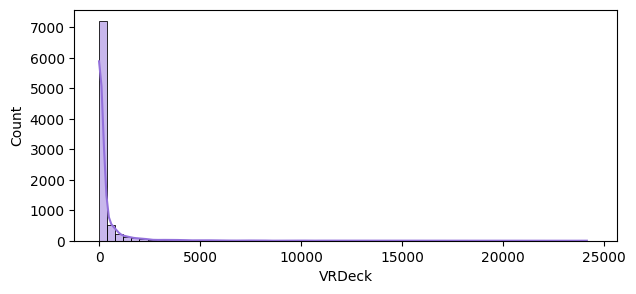

In [16]:
plt.figure(figsize = (7,3))
sns.histplot(data=data, x='VRDeck', binwidth=400, kde=True, color='mediumpurple')

As we can clearly see, the 5 "services" features have the same distribution. With a small amount of people who spent a lot and the major part spending zero. Suspecting that the The five features could be related and that the same people who spend in a field also spend in others, we would be tempted to construct a single "expenses" feature. Let's the analyze the combined ditribution and the correlation between them.

In [17]:
services_features =['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [18]:
services = data[services_features]
services.head()

RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0          0.0        0.0           0.0     0.0     0.0
1        109.0        9.0          25.0   549.0    44.0
2         43.0     3576.0           0.0  6715.0    49.0
3          0.0     1283.0         371.0  3329.0   193.0
4        303.0       70.0         151.0   565.0     2.0

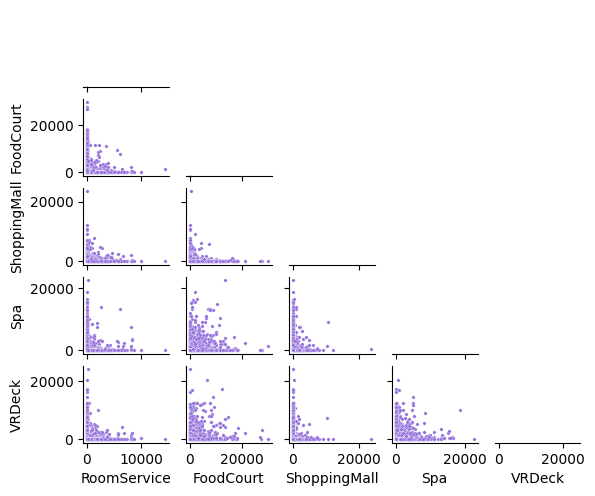

In [19]:
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Set the desired height and aspect ratio
height = 1
aspect = 1.2

sns.pairplot(services, vars=features, plot_kws={'s': 6, 'color': 'mediumpurple'}, diag_kws={'color': 'mediumpurple'}, corner=True, height=height, aspect=aspect)
plt.show()

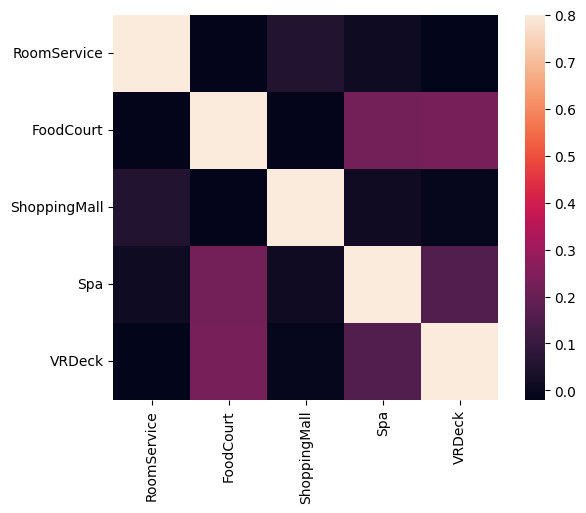

In [20]:
corrmat = services.corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

From the plot of the combind distibution between couples of variables we notice the lack of correlation. This is indeed confirmed 
by the correlation matrix which shows that the highest value is around 0.35. We conclude that the construction of a single feature
would loose information and the expenses feature must be kept separate.

In [21]:
# #correlation matrix

# data_num=np.array([data['Age'], data['RoomService'], data['FoodCourt'], data['ShoppingMall'], data['Spa'], data['VRDeck']])
# data_num=pd.DataFrame(data_num.T, columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])
# data_num.head()
# corrmat = data_num.corr()
# f, ax = plt.subplots(figsize=(9, 7))
# sns.heatmap(corrmat, vmax=.8, square=True);


## Categorical Features

We know focus on the catgorical features, starting with the simplest ones.

### HomePlanet 

<Axes: xlabel='HomePlanet', ylabel='count'>

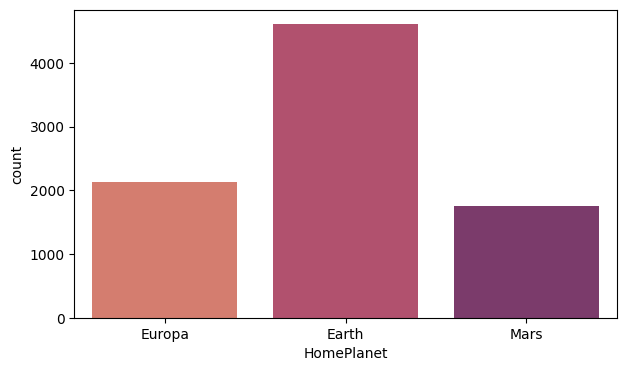

In [22]:
fig=plt.figure(figsize=(7,4))
palette = {0: "#9900b4", 1: "#0054b4", 2: "#b4004c"}
sns.countplot(data=data, x='HomePlanet', palette='flare')


Earth is the most common planet to depart from.

### CryoSleep 

<Axes: xlabel='CryoSleep', ylabel='count'>

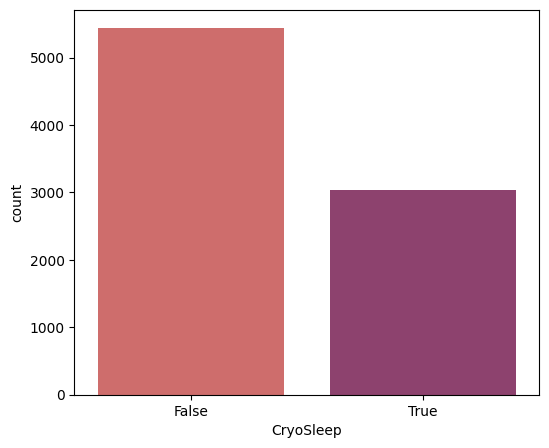

In [23]:
fig=plt.figure(figsize=(6,5))
sns.countplot(data=data, x='CryoSleep', palette='flare')

### Destination 

<Axes: xlabel='Destination', ylabel='count'>

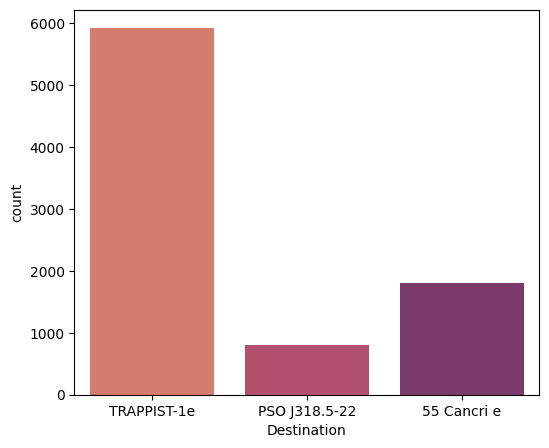

In [24]:
fig=plt.figure(figsize=(6,5))
sns.countplot(data=data, x='Destination', palette='flare')

TRAPPIST-1e is by far the most common destination.

### VIP

<Axes: xlabel='VIP', ylabel='count'>

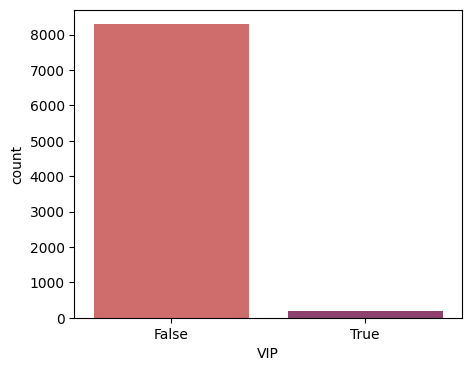

In [25]:
fig=plt.figure(figsize=(5,4))
sns.countplot(data=data, x='VIP', palette='flare')

We see that only a small percentage of passenger have a VIP card.

Let's now focus on the two most elaborate categorical features. Passenger ID and Cabin.

### Passenger ID

In [26]:
data['PassengerId'][:5]

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

We know that Passenger ID is composed by 6 digits, the first 4 labeling the number of the group and the last two indicate the number of a the person inside is group. So we create two different features respectively, 'Group' and 'Member', and plot their distribution.

Text(0, 0.5, '# Components')

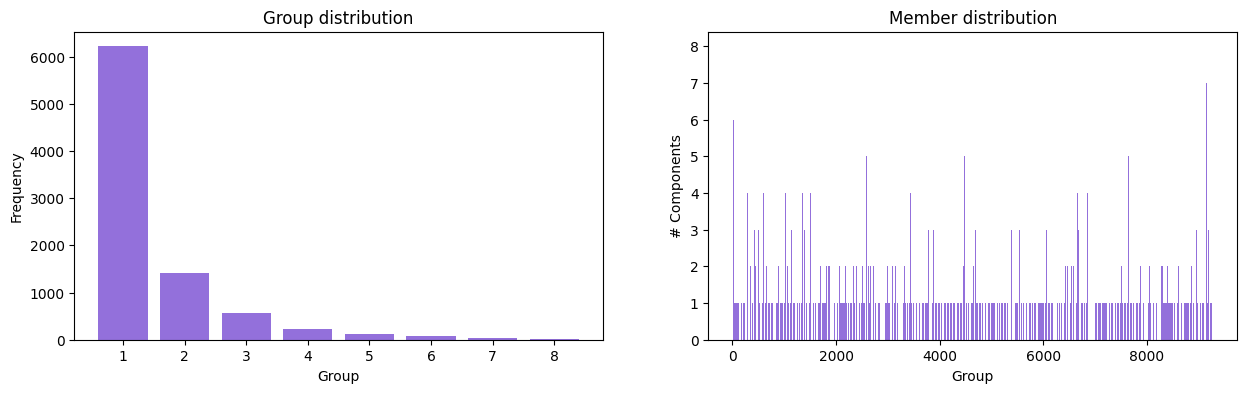

In [27]:
group, member = [],[]
for pID in data['PassengerId']:
    group.append(int(pID[0:4]))
    member.append(int(pID[5:7]))

plt.figure(figsize = (15,4))


fres, bins = np.histogram(member, np.linspace(0.5,8.5,9))
bins = [1,2,3,4,5,6,7,8]
plt.subplot(1,2,1)
plt.title('Group distribution')
plt.bar(bins,fres,  color='mediumpurple')
plt.xlabel('Group')
plt.ylabel('Frequency')


plt.subplot(1,2,2)
plt.title('Member distribution')
unique, counts = np.unique(group, return_counts=True)
plt.bar(unique,counts, color='mediumpurple')
plt.xlabel('Group')
plt.ylabel('# Components')



From theese plots we see that there are circa 9000 groups and most of them are composed by a single member. The maximum number of members in a group is 8 and the member distribution follows a negative exponential.

We now drop 'Passenger ID' and add the new two features.

In [28]:
#now split the feature IdPassenger in two features, group and member
data['Group'] = group
data['Member'] = member
data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Group  Member  
0          0.0        0.0           0.0     0.0     0.0      1       1  
1        109.0        9.0          25.0   549.0    44.0      2       1  
2         43.0     3576.0           0.0  6715.0    49.0      3       1  
3          0.0     1283.0         371.0  3329.0   193.0      3       2  
4        303.0       70.0         151.0   565.0     2.0      4       1

In [29]:
if 'PassengerId' in data.keys():
    data = data.drop(['PassengerId'], axis=1)

### Cabin 

In [30]:
data['Cabin'][:5]

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

Folowing the same logic, from 'Cabin' we construct the three different features: 'Deck' (deck of the cabin), 'Num' (number of cabin in the deck), 'Side' (which can be 'S' pr 'P').

In [31]:
cabin_dict = {
    'Deck': [],
    'Num': [],
    'Side': []
}
for c in data["Cabin"]:
    #split c by /
    if type(c) == float:
        cabin_dict['Deck'].append(np.nan)
        cabin_dict['Num'].append(np.nan)
        cabin_dict['Side'].append(np.nan)
        continue
    c = c.split('/')
    for i,let in enumerate('ABCDEFGT'):
        if c[0] == let:
            cabin_dict['Deck'].append(let)

    # cabin_dict['Deck'].append(c[0])
    cabin_dict['Num'].append(int(c[1]))

    for i,let in enumerate('SP'):
        if c[2] == let:
            cabin_dict['Side'].append(let)

# cabin_dict into dataframe
cabin_df = pd.DataFrame(cabin_dict)
cabin_df[:5]

Deck  Num Side
0    B  0.0    P
1    F  0.0    S
2    A  0.0    S
3    A  0.0    S
4    F  1.0    S

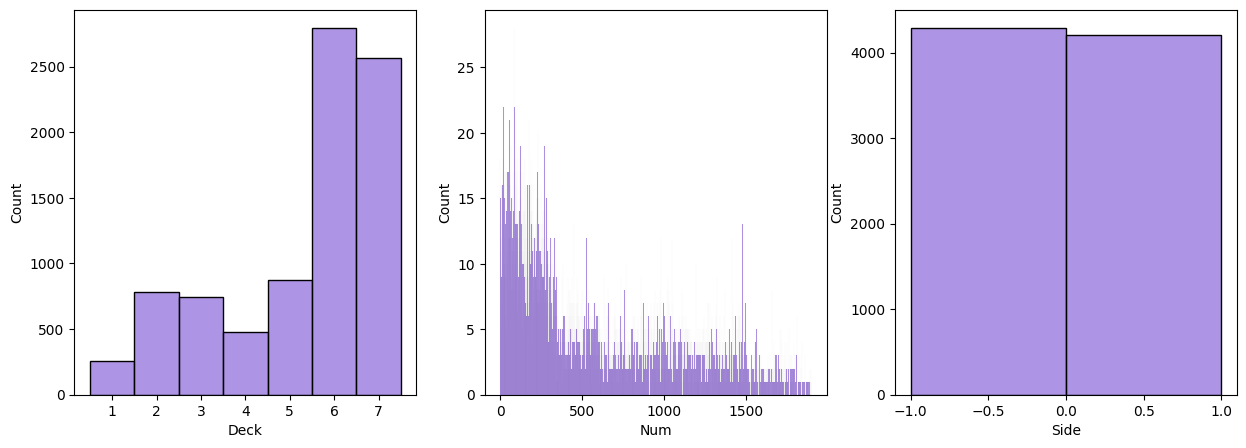

In [32]:
num_cabin_df = {}
# Maps non numeric datas in numeric values
num_cabin_df['Deck'] = cabin_df['Deck'].map({'A': 0.5, 'B': 1.5, 'C': 2.5, 'D': 3.5, 'E': 4.5, 'F': 5.5, 'G':6.5, 'T':7.5})
num_cabin_df['Side'] = cabin_df['Side'].map({'S': -1, 'P': 1})
num_cabin_df['Num'] = cabin_df['Num']

# plot the distribution of the features using subplot(1,3)
fig, ax = plt.subplots(1,3, figsize=(15,5))

#plot frequency of the features Deck, Num and Side
sns.histplot(data=num_cabin_df, x='Deck', binwidth=1, color='mediumpurple', ax=ax[0])
sns.histplot(data=num_cabin_df, x='Num', binwidth=1,  color='mediumpurple', ax=ax[1])
sns.histplot(data=num_cabin_df, x='Side', binwidth=1, color='mediumpurple', ax=ax[2])
plt.show()




Now let's plot produce some scatter plots to see the relation between the new features.\
We will use stripplot from seaborn library in order to avoid overlapping, and understand the density of the points.

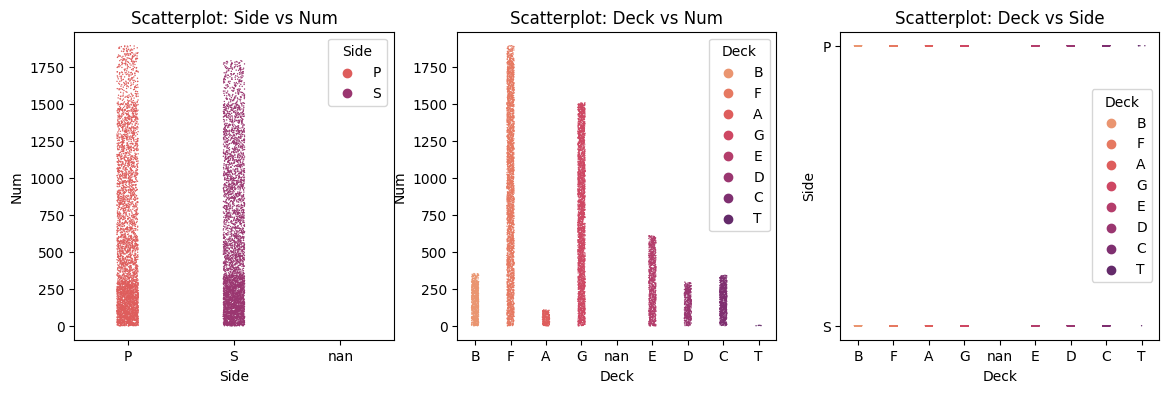

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.stripplot(data=cabin_df, x="Side", y="Num", ax=axes[0], s=1, hue='Side', palette='flare')
axes[0].set_title("Scatterplot: Side vs Num")

sns.stripplot(data=cabin_df, x="Deck", y="Num", ax=axes[1], s=1, hue='Deck', palette='flare')
axes[1].set_title("Scatterplot: Deck vs Num")

sns.stripplot(data=cabin_df, x="Deck", y="Side", ax=axes[2], s=1, hue='Deck', palette='flare')
axes[2].set_title("Scatterplot: Deck vs Side")

plt.show()

From this plot we notice that the the decks are not evenly populated. The most poplated is the 'F' while the 'T' has only a handful of passengers. As a consequence ther are more cabins with a low number since they are present in every deck while high numbers can be reached only in the more populated decks. The side is instead quite evenly distributed.

We now merge the 3 new features to the dataset.

In [34]:
# drop Cabin
if 'Cabin' in data.keys():
    data = data.drop(['Cabin'], axis=1)

In [35]:
# merge the two dataframe
data = pd.concat([data, cabin_df], axis=1)
data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Group  Member Deck  Num Side  
0           0.0     0.0     0.0      1       1    B  0.0    P  
1          25.0   549.0    44.0      2       1    F  0.0    S  
2           0.0  6715.0    49.0      3       1    A  0.0    S  
3         371.0  3329.0   193.0      3       2    A  0.0    S  
4         151.0   565.0     2.0      4       1    F  1.0    S

# Chapter 2

Having explored the dataset we will now concentrate on the preprocessing of data.\
We start by analyzing the missing values present in our dataset and finding the smartest way possible to deal with them. We will better analyze all the relations between the features and also we will take into account the relations between the new build features and the others.

## Missing Values

In [36]:
data.isna().any()

HomePlanet       True
CryoSleep        True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Group           False
Member          False
Deck             True
Num              True
Side             True
dtype: bool

We see that all the features have missing values apart from 'Group' and 'Member' which in our original datasets were part of 'Passenger ID'. 
Now let's count the missing values for every column.

In [37]:
# Columns with missing values
na_cols=data.columns[data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

Number_missing  Percentage_missing
HomePlanet               201                2.31
CryoSleep                217                2.50
Destination              182                2.09
Age                      179                2.06
VIP                      203                2.34
RoomService              181                2.08
FoodCourt                183                2.11
ShoppingMall             208                2.39
Spa                      183                2.11
VRDeck                   188                2.16
Deck                     199                2.29
Num                      199                2.29
Side                     199                2.29

Now we will try to count how many missing values are present in the same rows, in order to decide if we can drop the entire row or if we have to fill the missing values.

Counter({0: 6764, 1: 1587, 3: 167, 2: 135, 4: 36, 5: 4})


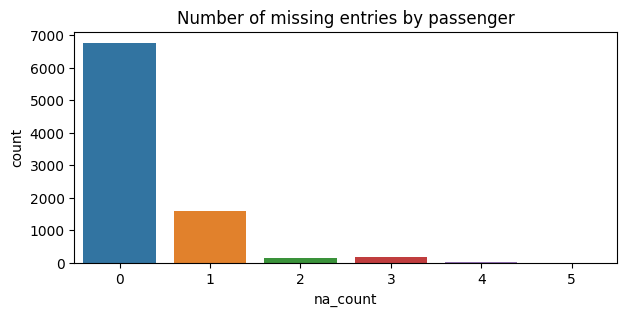

In [38]:
# Countplot of number of missing values by passenger
data['na_count']=data.isna().sum(axis=1)
plt.figure(figsize=(7,3))
sns.countplot(data=data, x='na_count')
plt.title('Number of missing entries by passenger')

count_miss=Counter(data['na_count'])
print(count_miss)


The missing values are around 200 for every feature, but they are not concentrated on the same entries. Infact, as we can see from the histogram most of the passengers with missing values have only one while passengers with 2, 3, 4 and 5 are less and less probable. As a consequence around 2000 entries have at least a missing value and eliminating every one of them will make us loose a significant part of the dataset. 
At the same time a passenger has 13 features. Since we saw that, excluding the very few passengers with 4 and 5 missing values, the maximum number of missing feature for a single passanger is 3, the percentage of missing feature is relatively low. So a good way to deal with the problem seems to be eliminating the few passengers with 4 and 5 missing features and try to fill all the other missing values in the most efficient way.


In [39]:
if 'na_count' in data.keys():
    data.drop('na_count', axis=1, inplace=True)
print("Before drop: ", len(data))

#drop rows with 4 or 5 missing values
index = []
for i in range(len(data)):
    if data.iloc[i].isna().sum()>=4:
        index.append(i)
data.drop(index, inplace=True)
data.reset_index(drop=True, inplace=True)

#drop also from label
label.drop(index, inplace=True)
label.reset_index(drop=True, inplace=True)


print("Dropped: ", len(index))

print("After drop: ",len(data))

Before drop:  8693
Dropped:  40
After drop:  8653


# Fill missing values

Let's check if the new columns we introduced by separating 'Passengerer ID' and 'Cabin' brought to light correlations between features.

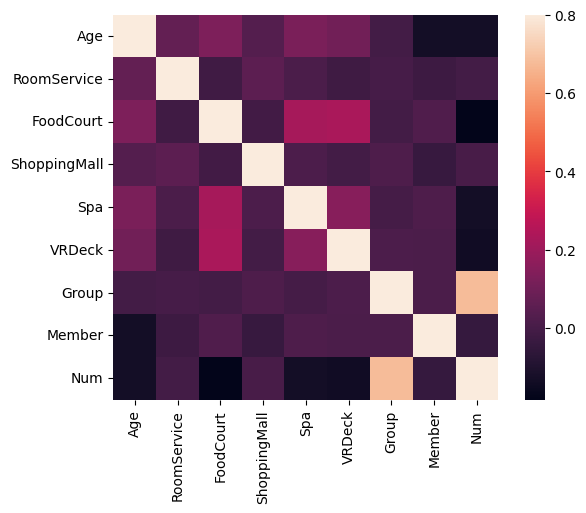

In [40]:
# correlation matrix with the new features
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'Member', 'Num']
corrmat = data[num_features].corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

We indeed notice a strong correlation between 'Group' and 'Num'. Let's try to visualize it.

### Group and Cabin Number

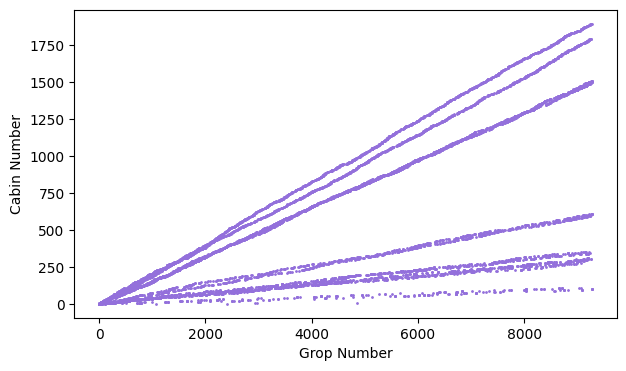

In [41]:
plt.figure(figsize = (7,4))
plt.xlabel('Grop Number')
plt.ylabel('Cabin Number')
plt.scatter(data['Group'], data['Num'], color='mediumpurple', s=1)

We clearly see that as we increase the group number, the cabin number increases too, but with different coefficients. From the plot of the cabin number per deck we saw how, for each deck,  the cabin number went from 0 to a certain value and decks were differently populated and so had different maximum cabin number. We then strongly suspect that the different slopes here represent the different decks. Let's then plot the points with different colors depending on the deck.

In [42]:
size_plt = []
for s in data['Side']:
    if s == 'S':
        size_plt.append(0.5)
    if s == 'P':
        size_plt.append(0.1)
    if type(s) == float:
        size_plt.append(0)

In [43]:
import plotly.express as px
fig = px.scatter(data, x="Group", y="Num", color="Deck", trendline="ols", template="simple_white", size=size_plt)
fig.show()

This is a remarkable plot that confirms our thoughts. We then foresee a strategy to fill ther missing cabin values: when we have an entry with a missing cabin values(so he misses 'Deck', 'Num', 'Group' ) we check his group number. We know that passengers in the same group are not necessarely put in the same cabin but are for sure close, so most certainly in the same deck and side. So we explore other members of his group and take the most common deck among them to fill 'Deck' and the most common side to fill 'Side'. Then once we have the 'Deck' we have the specific slope of the line that relates 'Group' and 'Num', so we can fill 'Num' with the closest integer to y=mx + b where x is 'Group' and m and b are derived from the specific deck. 
If the passenger is alone in the group we just fill the deck with 'F' wich is by far the most common and randomly choose the side between 'S' and 'P' since they are evenly distributed. Then we apply the same logic to fill 'Num'.

For this process it is useful to introduce a feature that tells us directly if a member is alone in a group or not.

In [44]:
# add data['Alone'] feature of all 0
alone = np.zeros(len(data['Group']))

# create feature "Alone" to check if the passenger is alone or not
id_ = 0
for g in data['Group']:
    count=len(data['Member'][data['Group']==g])
    #print(type(len(data['Member'][data['Group']==g])))
    if count == 1:
        alone[id_] = 1
        
    id_ += 1
 

data["Alone"] = alone    
print("Alone passengers", data["Alone"].sum())
print("Percentage: ", np.round(100*data["Alone"].sum()/len(data),2), "%")

Alone passengers 4802.0
Percentage:  55.5 %


Let's now store the different lines for the different decks and perform a linear fit to obtain the slope and intercept parameters for each one of them. We then store the parameters in a dictionary

In [45]:
fit_params={}
slopes=[]
inter=[]

for i, lett in enumerate('ABCDEFGT'):
    x = data['Group'][data['Deck'] == lett]
    y = data['Num'][data['Deck'] == lett]

    m, b = np.polyfit(x, y, 1)

    #store the parameters
    fit_params[lett]=[]
    fit_params[lett].append(m)
    fit_params[lett].append(b)

print(fit_params)

{'A': [0.011345432816467216, -2.2780532827825852], 'B': [0.035833810044064156, 0.6269908711564003], 'C': [0.03497349139023989, 1.1093915196167643], 'D': [0.030138523991481935, 5.557242557622644], 'E': [0.06491654803222259, -0.9653922677020065], 'F': [0.1993934484531681, -3.1269723777142597], 'G': [0.16261240789066003, -4.798066203007176], 'T': [0.0005541280507195021, 0.02029175300884329]}


In [46]:
print(data['Num'][data['Deck']=='T'])

996     0.0
2237    1.0
2717    2.0
2745    3.0
4542    2.0
Name: Num, dtype: float64


We see that there is only 5 passenger in deck 'T' which makes the line totally unprecise, but as we see in the cell below the problem of how to fill the 'Num' of passengers with the deck in T does not even come up, since there is no passenger with a missing cabin value and which is in a group in which the majority of other passengers have 'T' as deck. In the for loop below i  added a variable that counts the 'T' deck values added and it is indeed 0.

In [47]:
# search for a nan in the y and fill it with the value of the line
from collections import Counter
count_ts=0


for i in range(len(data['Deck'])):
    if pd.isna(data['Deck'][i]):
        g = data['Group'][i]

        if data['Alone'][i]==0.0:         # if not alone then check the deck and side of other people in the group
            deck_nonan = []
            side_nonan = []
            num_nonan = []
            for deck_all in (data['Deck'][data['Group']==g]):       #take away the nans in the count
                if type(deck_all)!=float:
                    deck_nonan.append(deck_all)
                    
            for side_all in (data['Side'][data['Group']==g]):
                if type(side_all)!=float:
                    side_nonan.append(side_all)
                    
            for num_all in (data['Num'][data['Group']==g]):
                if type(num_all)!=float:
                    num_nonan.append(num_all)
        
            if side_nonan == [] or deck_nonan == [] or num_nonan == [] : #if the other members of the group all have nan i fill with F cause i can't guess the deck
                deck='F'
            else:
                counter_deck = Counter(deck_nonan)
                counter_side = Counter(side_nonan)
                counter_num = Counter(num_nonan)
            
                deck, count_deck = counter_deck.most_common(1)[0]        #most common value in the list
                side, count_side = counter_side.most_common(1)[0]
           
            
            if deck=='T':
                count_ts+=1
                
            data.loc[i, 'Deck']=deck 
            data.loc[i, 'Side']=side
                
        else:                
            deck ='F'
            
            choice=np.random.rand()
            if choice >=0.5:
                side='S'
            else:
                side='P'
            
            data.loc[i, 'Deck']=deck 
            data.loc[i, 'Side']=side
        
        m=fit_params[deck][0]
        b=fit_params[deck][1]
        num_fit=int(m*g + b)
        data.loc[i, 'Num']=num_fit
        

print('T\'s added : {}'.format(count_ts))
print('Missing values of Deck, Num, Side: {} {} {}'.format(data['Deck'].isna().sum(), data['Num'].isna().sum(), data['Side'].isna().sum()))

T's added : 0
Missing values of Deck, Num, Side: 0 0 0


Since 'Group' has no missing values we filled all the cabin missing slots.

Now let's visualize the combined plots including categorical variables to extrapolate other possible relations. We will just see the combined distribution of the features that we know there are no missing values.

In [48]:
data.keys()

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'Member', 'Deck',
       'Num', 'Side', 'Alone'],
      dtype='object')

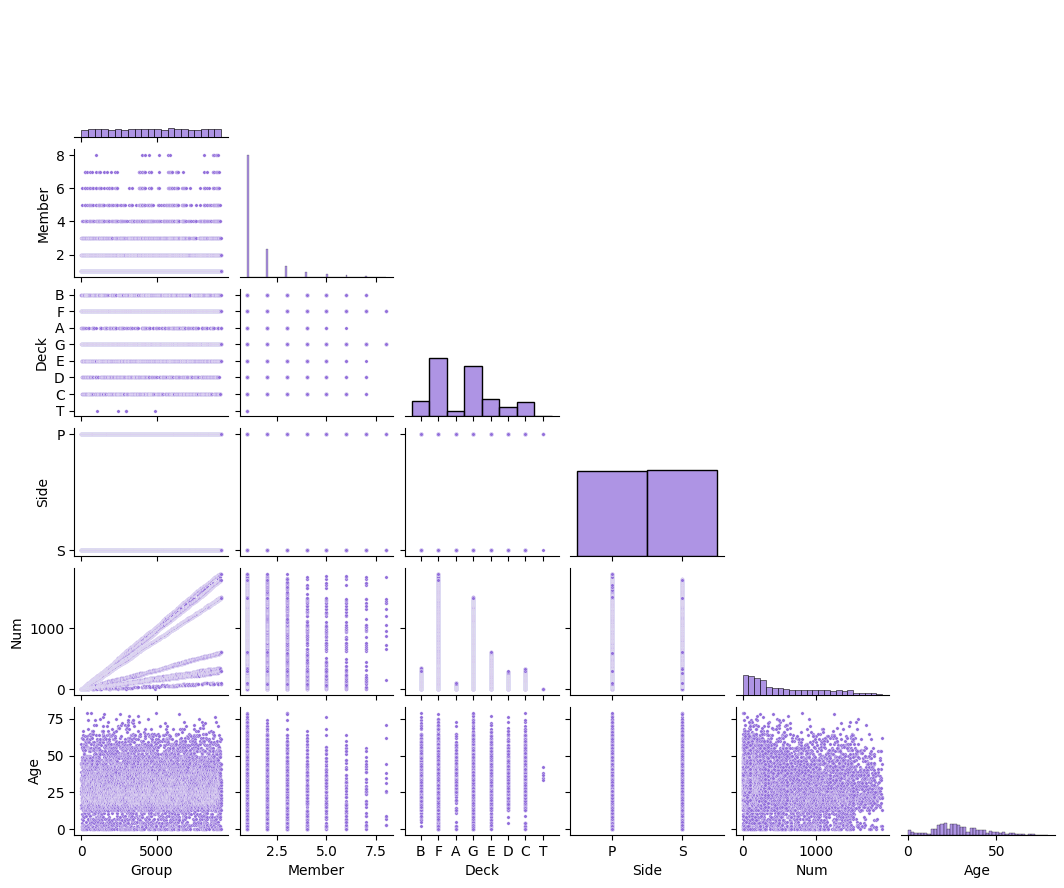

In [49]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming data is your DataFrame
# # Example:
# # data = pd.DataFrame(...) 

# # space for the big plot
# fig, ax = plt.subplots(5, 5, figsize=(15, 15))

# # SUBPLOT
# for i, feat in enumerate(['Group', 'Member', 'Deck', 'Side', 'Num']):
#     for j, feat2 in enumerate(['HomePlanet', 'CryoSleep', 'Destination', 'Age']):
#         if feat2 != feat:
#             ax[i, j].scatter(data[feat2], data[feat], color='mediumpurple', s=1)
#             ax[i, j].set_xlabel(feat2)
#             ax[i, j].set_ylabel(feat)
#             ax[i, j].grid(True)

# # Remove empty subplots
# for i in range(5):
#     for j in range(5):
#         if i * 5 + j >= len(data.columns) - 1:
#             fig.delaxes(ax[i, j])

# # Adjust layout
# plt.tight_layout()

# plt.show()

sns.pairplot(data, vars=['Group', 'Member', 'Deck', 'Side', 'Num', 'Age'], plot_kws={'s': 6, 'color': 'mediumpurple'}, diag_kws={'color': 'mediumpurple'}, corner=True, height=1.5, aspect=1.2)

### Group Member vs Age

We notice a relation between age and group member. This could be due to the fact that usually a group is constituted by family members and, if parents are identified as number 1 and 2 and children as the following, we could notice a descending trend of the age as the 'Member' increases.

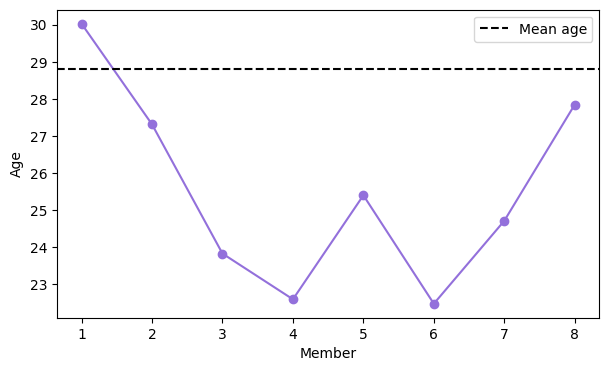

In [50]:
##  Grafico member vs Mean of age per member
mean_age = []
member = []
for m in np.unique(data['Member']):
    member.append(m)
    mean_age.append(data['Age'][data['Member'] == m].mean())


plt.figure(figsize = (7,4))
plt.plot(member,mean_age, 'o-', color='mediumpurple')
#plot real mean age of entire dataset as line
plt.axhline(y=data['Age'].mean(), color='black', linestyle='--', label='Mean age')
plt.xlabel('Member')
plt.ylabel('Age')
plt.legend()
plt.show()



We indeed notice a descending trend since member number reaches 6. Then the mean age start to increase again. Either way we see that the average age per member differs a lot to the total average age, so we proceed to fill the missing values of age with the average age by member instead of filling them simply with the total average age.

In [51]:
for i in range(len(data['Age'])):
    if np.isnan(data['Age'][i]):
        data.loc[i, 'Age'] = mean_age[data['Member'][i]-1]

print('Missing Age values: {}'.format(data['Age'].isna().sum()))

Missing Age values: 0


### Num and HomePlanet

We notice also a difference in the 'HomePlanet' take the cabin number in to account. Let's visualize it better.

Text(0, 0.5, 'Num')

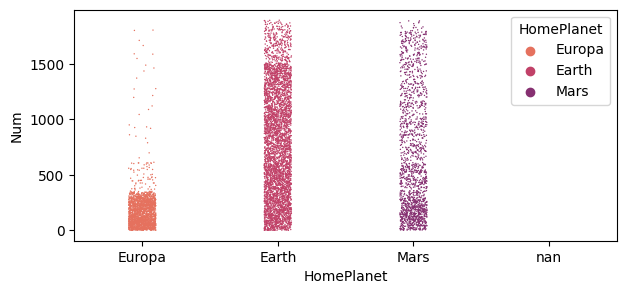

In [52]:
## Num and HOmePlanet
#plot the distribution of the features Num vs HomePlanet using scatterplot
plt.figure(figsize = (7,3))
sns.stripplot(data=data, x="HomePlanet", y="Num", s=1, hue='HomePlanet', palette='flare')


# plt.scatter(data['Num'], data['HomePlanet'], s=1)
plt.xlabel('HomePlanet')
plt.ylabel('Num')
# plt.show()


We notice how for low cabin numbers they seem to be concentrated in Europa while after a certain threshold earth becomes very dominant. We calculate then then threshold of cabin number for which the density of Earth surpasses Europa.

Threshold = 315
Count of Europa's under threshold = 1933
Count of Earth's under threshold = 1040


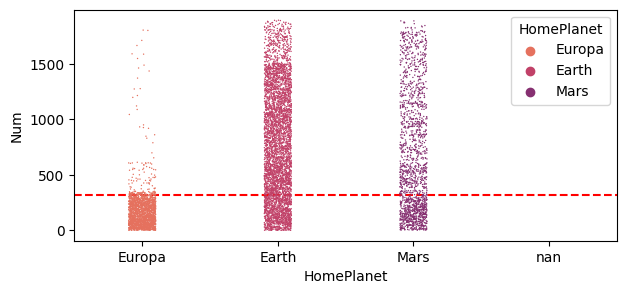

In [53]:
## Num and HOmePlanet
#plot the distribution of the features Num vs HomePlanet using scatterplot
plt.figure(figsize = (7,3))
sns.stripplot(data=data, x="HomePlanet", y="Num", s=1, hue='HomePlanet', palette='flare')


plt.xlabel('HomePlanet')
plt.ylabel('Num')


# count the number of passenger with HomePlanet == 'Europa' and Num < max_num_europa

threshold = 0
earth_under_thresh=0
eur_under_thresh=0
width=15
for i in range(width, 500):
    count_eur = 0
    count_earth = 0
    dens_eur=0
    dens_earth=0
    for n in data['Num'][data['HomePlanet'] == 'Europa']:
        if n < i:
            count_eur += 1
            if n > i-width:
                dens_eur+=1
    

    for n in data['Num'][data['HomePlanet'] == 'Earth']:
        if n < i:
            count_earth += 1
            if n > i-width:
                dens_earth+=1
    #print(dens_eur, dens_earth)
    
    if dens_earth > dens_eur:
        threshold = i
        earth_under_thresh=count_earth
        eur_under_thresh=count_eur
        break

print('Threshold = {}'.format(threshold))
print('Count of Europa\'s under threshold = {}'.format(eur_under_thresh))
print('Count of Earth\'s under threshold = {}'.format(earth_under_thresh))

plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()

We see how before the threshold Europa has much more values than Earth so we can fill the missing 'HomePlanet' value with 'Europa' if the cabin number is below the threshold and with 'Earth' if above. This is a better guess then filling everything with the mode which would be 'Earth'.

In [54]:
#now fill the data['HomePlanet'] with Europa if data['Num'] > max_num_europa
# else fill with Earth

for i in range(len(data['Num'])):
    # check if is nan, is a string otherwise
    if pd.isna(data['HomePlanet'][i]):
        if data['Num'][i] < threshold:
            data.loc[i, 'HomePlanet'] = 'Europa'
        else:
            data.loc[i, 'HomePlanet'] = 'Earth'
            

print('Missing HomePlanet values: {}'.format( data['HomePlanet'].isna().sum()))

Missing HomePlanet values: 0


Let's take a look at the missing values remaining.

In [55]:
data.isna().sum(axis=0)

HomePlanet        0
CryoSleep       210
Destination     178
Age               0
VIP             197
RoomService     177
FoodCourt       178
ShoppingMall    206
Spa             181
VRDeck          184
Group             0
Member            0
Deck              0
Num               0
Side              0
Alone             0
dtype: int64

Let's focus on the services features

### Services

In [56]:
services = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [57]:
print(data[services].mean())
print(data[services].median())
print(data[services].mode())

RoomService     223.359958
FoodCourt       458.969558
ShoppingMall    173.852610
Spa             310.296152
VRDeck          305.450939
dtype: float64
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64
   RoomService  FoodCourt  ShoppingMall  Spa  VRDeck
0          0.0        0.0           0.0  0.0     0.0


For everyone of the feature we have a mean of the order of the hundrends but the median and the mode equal to zero. This is beacuse, as we saw repeatedly in the first chapter, most of the passenger spend zero in a given feature while few spend a lot. So in this case filling the missing values with the average would contradict the logic of the initial distribution and the more correct choice is to fill the missing every missing value with 0 which is the mode for every feature.

In [58]:
data['RoomService'].fillna(data['RoomService'].median(), inplace=True)
data['FoodCourt'].fillna(data['FoodCourt'].median(), inplace=True)
data['ShoppingMall'].fillna(data['ShoppingMall'].median(), inplace=True)
data['Spa'].fillna(data['Spa'].median(), inplace=True)
data['VRDeck'].fillna(data['VRDeck'].median(), inplace=True)

### Cryosleep

We lnow that passengers in CryoSleep are confined in their cabins so we know for certain that if a passenger has expenses firrent from 0 in the services like feature, it means his CryoSleep feature must be False. Though since for this feature also the mode is False as we have seen from the plot in Chapter 1, we fill every missing value with false without committing logical fallacies.
Out of curiosity we can see how many of the values we False with 100% certainty because they spent money.

In [59]:
for i in range(len(data['CryoSleep'])):
    if pd.isna(data['CryoSleep'][i]):
        for serv in services:
            if data[serv][i]!=0:
                data.loc[i, 'CryoSleep']=False
            
print('CryoSleep values 100% False: {}'.format(data['CryoSleep'].isna().sum()))           

CryoSleep values 100% False: 96


In [60]:
data['CryoSleep'].fillna(False, inplace=True)

### VIP and Destination

Since we have not found further correlations between datas the logical choice for filling the two categorical features 'Destination' and 'VIP' is to fill them with the most common value(mode). This is suggested also by the fact that for both features, as we have seen with the plots in Chapter 1, the mode is significantly more probable that the other values.

In [61]:
print('Mode for Destination: {}'.format(data['Destination'].mode()[0]))
print('Mode for VIP: {}'.format(data['VIP'].mode()[0]))
data['Destination'].fillna('TRAPPIST-1e', inplace=True)
data['VIP'].fillna(False, inplace=True)

Mode for Destination: TRAPPIST-1e
Mode for VIP: False


In [62]:
data.isna().sum(axis=0)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
Member          0
Deck            0
Num             0
Side            0
Alone           0
dtype: int64

In [63]:
a = {}
a["dead"] = [1,0,1]
a["alive"] = [1,2,3]
a["new"] = np.array(a['alive'] )+ np.array(a[ 'dead'])
a

{'dead': [1, 0, 1], 'alive': [1, 2, 3], 'new': array([2, 2, 4])}

In [64]:
data.keys()

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'Member', 'Deck',
       'Num', 'Side', 'Alone'],
      dtype='object')

## Normalization

We now prepare our complete dataset for the further analysis which will include dimensionaly reduction which PCA and different clustering algorithims. So we must normalize the dataset.

**Min-Max Normalization**

Min-Max normalization is a simple normalization technique that re-scales a feature or observation value with distribution value between 0 and 1. The formula for min-max normalization is given as:

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

where $X_{norm}$ is the normalized value, $X$ is the original value, $X_{min}$ is the minimum value and $X_{max}$ is the maximum value of the feature respectively.



In [65]:
# normaize features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()        
data[num_features] = scaler.fit_transform(data[num_features])
data.head()

HomePlanet  CryoSleep  Destination       Age    VIP  RoomService  FoodCourt  \
0     Europa      False  TRAPPIST-1e  0.493671  False     0.000000   0.000000   
1      Earth      False  TRAPPIST-1e  0.303797  False     0.007608   0.000302   
2     Europa      False  TRAPPIST-1e  0.734177   True     0.003001   0.119948   
3     Europa      False  TRAPPIST-1e  0.417722  False     0.000000   0.043035   
4      Earth      False  TRAPPIST-1e  0.202532  False     0.021149   0.002348   

   ShoppingMall       Spa    VRDeck     Group    Member Deck       Num Side  \
0      0.000000  0.000000  0.000000  0.000000  0.000000    B  0.000000    P   
1      0.001064  0.024500  0.001823  0.000108  0.000000    F  0.000000    S   
2      0.000000  0.299670  0.002030  0.000216  0.000000    A  0.000000    S   
3      0.015793  0.148563  0.007997  0.000216  0.142857    A  0.000000    S   
4      0.006428  0.025214  0.000083  0.000323  0.000000    F  0.000528    S   

   Alone  
0    1.0  
1    1.0  
2    0.0  
3    0.0  
4    1.0

## One Hot Encoding

One-hot encoding is employed to represent categorical data numerically.\
Here will be used to converts the categorical variables into binary vectors, where each category is uniquely represented by a binary digit (0 or 1). This method ensures that the model can interpret and process categorical information effectively, as each category is isolated and independently encoded in the feature space.\

In [66]:
#one hot encode the categorical features
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Alone','Side']
data_encoded = pd.get_dummies(data, columns=cat_features)
data_encoded.head()


Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0  0.493671     0.000000   0.000000      0.000000  0.000000  0.000000   
1  0.303797     0.007608   0.000302      0.001064  0.024500  0.001823   
2  0.734177     0.003001   0.119948      0.000000  0.299670  0.002030   
3  0.417722     0.000000   0.043035      0.015793  0.148563  0.007997   
4  0.202532     0.021149   0.002348      0.006428  0.025214  0.000083   

      Group    Member       Num  HomePlanet_Earth  ...  Deck_C  Deck_D  \
0  0.000000  0.000000  0.000000                 0  ...       0       0   
1  0.000108  0.000000  0.000000                 1  ...       0       0   
2  0.000216  0.000000  0.000000                 0  ...       0       0   
3  0.000216  0.142857  0.000000                 0  ...       0       0   
4  0.000323  0.000000  0.000528                 1  ...       0       0   

   Deck_E  Deck_F  Deck_G  Deck_T  Alone_0.0  Alone_1.0  Side_P  Side_S  
0       0       0       0       0          0          1       1       0  
1       0       1       0       0          0          1       0       1  
2       0       0       0       0          1          0       0       1  
3       0       0       0       0          1          0       0       1  
4       0       1       0       0          0          1       0       1  

[5 rows x 31 columns]

# 3 Chapter

In this chapter ewe will perform a PCA in order to reduce dimensionality and that we will use different clustering algorithms to clusterize the data. We will then evaluate the results with internal and external indexes and try to interpret the results.

We will just use the label to visualize the plot of the pca, then we will evaluate the clustering algorithms using internal indexes using unsupervised learning. \
In the end of this chapter we will perform a comparison between the clustering results and the true label.

## PCA

### PCA explaineation

*Dimensionality Reduction*

When dealing with datasets featuring numerous columns, the challenge is to visualize data in a 2D (3D) space without creating (X, Y) plots for every column pair. Dimensionality Reduction techniques help by condensing excess dimensions into a chosen, reduced representation.

*PCA (Principal Component Analysis)*

PCA is a key technique for this. It identifies a new dataset representation capturing a fraction of the original variance, albeit with some loss. PCA finds directions where the dataset varies the most—designated as Principal Components (PCs). PC1 is the direction with the most variance, PC2 follows, and so on. These become features in our reduced space, also seen as optimal linear combinations of original features.




In [67]:
# do the pca withouth the pipe
from sklearn.decomposition import PCA
pca = PCA(random_state = 72)
pca.fit(data_encoded)
x_pca = pca.transform(data_encoded)
x_pca = pd.DataFrame(x_pca)
x_pca[:5]

0         1         2         3         4         5         6   \
0  0.082490 -0.740988  0.491349  0.857449 -0.277213 -1.012691 -0.309769   
1 -0.882504 -0.275032 -0.930416  0.050424  0.060983 -0.000564 -0.386261   
2  1.086432 -0.604595 -0.763517 -0.221427 -0.391505 -0.697931 -0.100695   
3  1.051228 -0.535645 -0.751399 -0.304806 -0.355602 -0.649815 -0.131305   
4 -0.883644 -0.271245 -0.928983  0.042301  0.061323  0.004000 -0.383631   

         7         8         9   ...        21        22        23  \
0  0.349766  0.078693 -0.226858  ... -0.041737 -0.000948 -0.018173   
1  0.755442 -0.111564 -0.114517  ... -0.007864 -0.000744 -0.008411   
2  0.317624  0.238315 -0.342414  ... -0.024499 -0.004523 -0.000591   
3  0.382531  0.138297 -0.241697  ... -0.019233 -0.005787  0.009981   
4  0.755720 -0.116595 -0.113655  ...  0.004035 -0.001605 -0.002374   

             24            25            26            27            28  \
0 -1.590275e-16 -1.688476e-15  6.750361e-16 -5.865685e-16 -5.459721e-16   
1  7.456308e-16 -3.327894e-16 -6.017204e-16  3.012568e-17 -2.580080e-16   
2 -6.248007e-16  1.312491e-16 -6.572315e-16 -1.346731e-16 -8.686307e-16   
3 -6.968922e-17 -6.615195e-16 -6.017204e-16 -2.365075e-17 -4.522970e-16   
4  9.121643e-16 -1.940115e-16 -6.017204e-16  5.788125e-17 -2.580080e-16   

             29            30  
0 -1.276279e-16  8.253785e-18  
1  6.332721e-17 -3.890901e-17  
2  4.675178e-16  1.276244e-16  
3  6.506194e-17  7.211329e-17  
4  6.332721e-17 -3.890901e-17  

[5 rows x 31 columns]

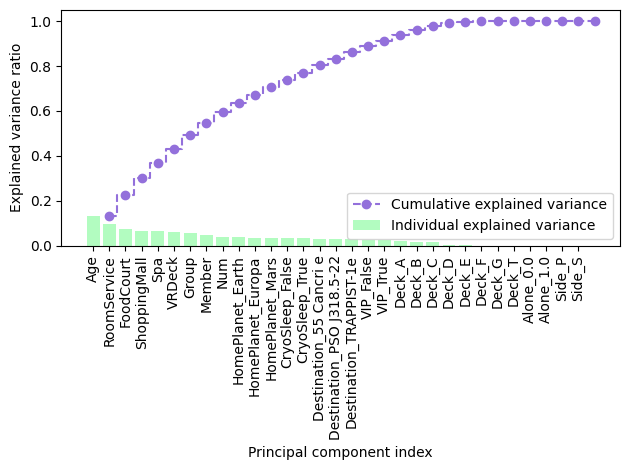

In [68]:
#impirt preprocessor.fit_transform
from sklearn import preprocessing
preprocessor = preprocessing.StandardScaler()
cov_mat = np.cov(preprocessor.fit_transform(data_encoded,label).T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)

var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

plt.bar(data_encoded.keys(), var_exp, alpha = 0.3, align = 'center', label = 'Individual explained variance', color = '#00f830')
#rotate the xticks
plt.xticks(rotation=90)
plt.step(range(1, len(var_exp)+1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance'
                     , color = 'mediumpurple', linestyle = '--', marker = 'o')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show();

From the cumulative explained variance plot we see that the last 10 components do not contribute to the total information. We will then drop them.

In [69]:
#remove the last 10 components from the x_pca
if len(x_pca.columns) > 10: 
    x_pca = x_pca.iloc[:,:-10]
x_pca.head()

0         1         2         3         4         5         6   \
0  0.082490 -0.740988  0.491349  0.857449 -0.277213 -1.012691 -0.309769   
1 -0.882504 -0.275032 -0.930416  0.050424  0.060983 -0.000564 -0.386261   
2  1.086432 -0.604595 -0.763517 -0.221427 -0.391505 -0.697931 -0.100695   
3  1.051228 -0.535645 -0.751399 -0.304806 -0.355602 -0.649815 -0.131305   
4 -0.883644 -0.271245 -0.928983  0.042301  0.061323  0.004000 -0.383631   

         7         8         9   ...        11        12        13        14  \
0  0.349766  0.078693 -0.226858  ... -0.294759 -0.171589 -0.067528  0.002236   
1  0.755442 -0.111564 -0.114517  ...  0.067385  0.000592 -0.029165 -0.084971   
2  0.317624  0.238315 -0.342414  ...  0.185924  1.622228  0.282637  0.190168   
3  0.382531  0.138297 -0.241697  ...  0.106173  0.353082  0.923321  0.007609   
4  0.755720 -0.116595 -0.113655  ...  0.063058 -0.007252 -0.024953 -0.184610   

         15        16        17        18        19        20  
0  0.044118  0.013297  0.191641 -0.078247 -0.003978  0.001684  
1 -0.049958  0.024473 -0.100854  0.006010  0.016740  0.000847  
2 -0.106842 -0.062688  0.287922  0.156217  0.211061 -0.041978  
3 -0.123741  0.073614  0.281423  0.039784  0.107687 -0.003962  
4 -0.054094  0.018494 -0.099604  0.005531  0.018970 -0.007683  

[5 rows x 21 columns]

Here is shown the plot of the explained variance ratio for every principal component. We see that the last 9 components do not contribute to increase the cumulative variance, so we will drop them.

**Important Valutation**:
The cumulative variance plot has provided valuable insights, indicating that over 80% of the variance in the data can be explained by the first 20 principal components in our Principal Component Analysis (PCA). Consequently, it has been determined that utilizing all these components is crucial for an effective clustering process.

While the clustering algorithms were applied using all 20 components to ensure comprehensive analysis, practical visualization constraints necessitate a focus on the first 3 components for plotting. This decision arises from the difficulty of visually interpreting data in dimensions beyond three.

It is imperative to bear in mind that, despite the presentation being limited to the first 3 components, the clustering outcomes are based on the entirety of non-dropped components. This strategy ensures a robust clustering analysis while addressing the challenges associated with visualizing high-dimensional data.

Now we will consider just the first 3 dimensions of the PCA and plot the data in a 3D space.\
Let's see the explained variance ratio of the first 3 components.

In [70]:
# total var by using the first 3 components
print('Total variance explained by the first 3 components: {}'.format(np.sum(pca.explained_variance_ratio_[:3])))
total_var = np.sum(pca.explained_variance_ratio_[:3])

Total variance explained by the first 3 components: 0.480205580443546


Plot the first 3 components and use the label 'Transported' to color the points.

In [71]:
x_pca = pd.DataFrame(x_pca)

In [72]:
# label = pd.DataFrame(label)

In [ ]:
color = []
for l in label:
    if l == 'Transported':
        color.append('red')
    else:
        color.append('blue')

In [73]:
#rapresent the firt 5 commponents in a pairplot using the label as hue
sns.pairplot(x_pca[:10])
plt.show()

In [ ]:
#pl
pp()

In [ ]:
fig = px.scatter_3d(
    x_pca, x = 0, y = 1, z = 2, color=label, size=0.1*np.ones(len(data_encoded)), opacity = 1, size_max=5,
    title=f'Total Explained Variance: {100*total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()

This is what we will try to obtain with the clustering algorithms.

## Clustering

Let's now start with the clustering algorithms. We will use the following algorithms:
- DBSCAN: Density-Based Spatial Clustering of Applications with Noise
- K-Means: K-Means Clustering, a clustering algorithm that aims to partition n observations into k clusters.
- Agglomerative Clustering: Agglomerative Clustering, a clustering algorithm that aims to group the data points into a hierarchical cluster.
- Gaussian Mixture: Gaussian Mixture Model, a clustering algorithm that assumes that the data is formed by Gaussian distributions.

### DBSCAN

In [ ]:
# try to clusterize data using the density based clustering algorithm DBSCAN the pca data
from sklearn.cluster import DBSCAN
from sklearn import metrics

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(x_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_DBS = db.labels_
print(labels_DBS)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_DBS)) - (1 if -1 in labels_DBS else 0)
print("Number of clusters:", n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pca, labels_DBS))


# #############################################################################
# Plot result using plotly
import plotly.express as px
fig = px.scatter_3d(
    x_pca, x = 0, y = 1, z=2, color=labels_DBS, size=0.1*np.ones(len(data_encoded)), opacity = 1, size_max=5,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()


[  0   1 115 ...  10 113  97]
Number of clusters: 167
Estimated number of clusters: 167
Silhouette Coefficient: 0.599


Detect the best number of clusters

In [ ]:
# compute siluette score in function of eps
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

eps_l = np.linspace(0.1, 1, 5)
min_samples_l = np.linspace(1, 100, 5)
#meshgrid
eps, min_samples = np.meshgrid(eps_l, min_samples_l)
siluette = []

for i in range(len(eps)):
    for j in range(len(min_samples)):
        db = DBSCAN(eps=eps[i][j], min_samples=int(min_samples[i][j])).fit(x_pca)
        if len(set(db.labels_)) == 1:
            siluette.append(0)
            continue
        labels = db.labels_
        siluette.append(metrics.silhouette_score(x_pca, labels))
        print(i,j)

siluette = np.array(siluette)
# siluette = siluette.reshape(10,10)
print(siluette)

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 1
2 2
2 3
2 4
3 1
3 2
3 3
3 4
4 1
4 2
4 3
4 4
[-0.01261091  0.4703989   0.62254889  0.63771596  0.62710761 -0.21191339
  0.26731284  0.46794079  0.48173394  0.481235    0.          0.04817008
  0.28523033  0.33052706  0.33504411  0.         -0.01989286  0.2128487
  0.23565146  0.23845075  0.         -0.0377504   0.07340639  0.2149401
  0.21503968]


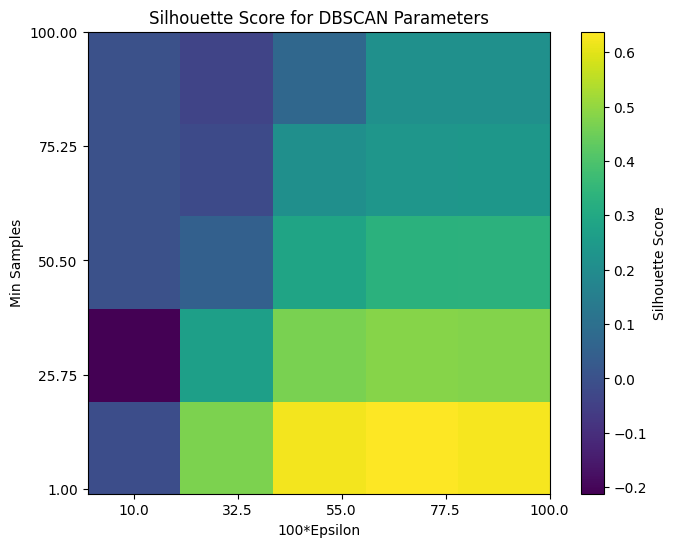

In [ ]:
import matplotlib.pyplot as plt

# Reshape silhouette scores to match the meshgrid
silhouette_matrix = siluette.reshape(eps.shape)

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.imshow(silhouette_matrix, cmap='viridis', origin='lower', extent=(0, 100, 0, 100))
plt.xticks(eps_l*100)
plt.yticks(min_samples_l)
plt.colorbar(label='Silhouette Score')
plt.title('Silhouette Score for DBSCAN Parameters')
plt.xlabel('100*Epsilon')
plt.ylabel('Min Samples')
plt.show()


### K-Means

In [ ]:
# cluster the data using KMeans, the pca data
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Compute KMeans
km = KMeans(n_clusters=16, random_state=0, n_init='auto').fit(x_pca)
labels_KMN = km.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_KMN)) - (1 if -1 in labels_KMN else 0)
print("Number of clusters:", n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pca, labels))


# #############################################################################
# Plot result using plotly
import plotly.express as px
fig = px.scatter_3d(
    x_pca, x = 0, y = 1, z=2, color=labels_KMN, size=0.1*np.ones(len(data_encoded)), opacity = 1, size_max=5,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()



[-1  0 -1 ...  2 -1 -1]
Number of clusters: 16
Estimated number of clusters: 16
Silhouette Coefficient: 0.215


In [ ]:
# valuate k means using calinski harabasz score
from sklearn.cluster import KMeans
from sklearn import metrics

k = np.linspace(2, 100, 30)
k = k.astype(int)


calinski = []
siluette = []
davis = []
#another score


for i in range(len(k)):
    km = KMeans(n_clusters=k[i], random_state=0, n_init='auto').fit(x_pca);
    labels = km.labels_
    calinski.append(metrics.calinski_harabasz_score(x_pca, labels))
    siluette.append(metrics.silhouette_score(x_pca, labels))
    davis.append(metrics.davies_bouldin_score(x_pca, labels))
    print(i/k.shape[0]*100, '%')

calinski = np.array(calinski)
print(calinski)

siluette = np.array(siluette)
print(siluette)

davis = np.array(davis)
print(davis)


0.0 %
3.3333333333333335 %
6.666666666666667 %
10.0 %
13.333333333333334 %
16.666666666666664 %
20.0 %
23.333333333333332 %
26.666666666666668 %
30.0 %
33.33333333333333 %
36.666666666666664 %
40.0 %
43.333333333333336 %
46.666666666666664 %
50.0 %
53.333333333333336 %
56.666666666666664 %
60.0 %
63.33333333333333 %
66.66666666666666 %
70.0 %
73.33333333333333 %
76.66666666666667 %
80.0 %
83.33333333333334 %
86.66666666666667 %
90.0 %
93.33333333333333 %
96.66666666666667 %
[1572.44340919 1248.14625398  940.06889232  854.35054733  818.3329221
  752.47689364  788.37257918  781.31100481  758.33910218  724.26140528
  732.60132289  739.33228709  732.57784742  739.48251038  750.11209822
  738.26910941  725.43450854  723.06217001  719.81179356  730.92070814
  724.2062436   721.71759169  728.72851515  727.08004727  725.66246869
  735.36762006  734.05705779  740.762788    735.15198513  719.22800628]
[0.16147105 0.16785705 0.17380418 0.20449875 0.22102475 0.23118535
 0.28144325 0.30751746 0.326

In [ ]:
np.array(davis)

array([2.31413392, 1.78590777, 2.06546942, 1.72568452, 1.67768805,
       1.63904586, 1.49140029, 1.44336373, 1.35422865, 1.29607844,
       1.25927971, 1.21097621, 1.20800679, 1.17618787, 1.18111062,
       1.18355726, 1.14947271, 1.11838969, 1.10753468, 1.09928617,
       1.08742986, 1.08566602, 1.04556267, 1.04627208, 1.04145493,
       1.02216316, 1.01466944, 1.00353909, 1.00336533, 1.01883289])

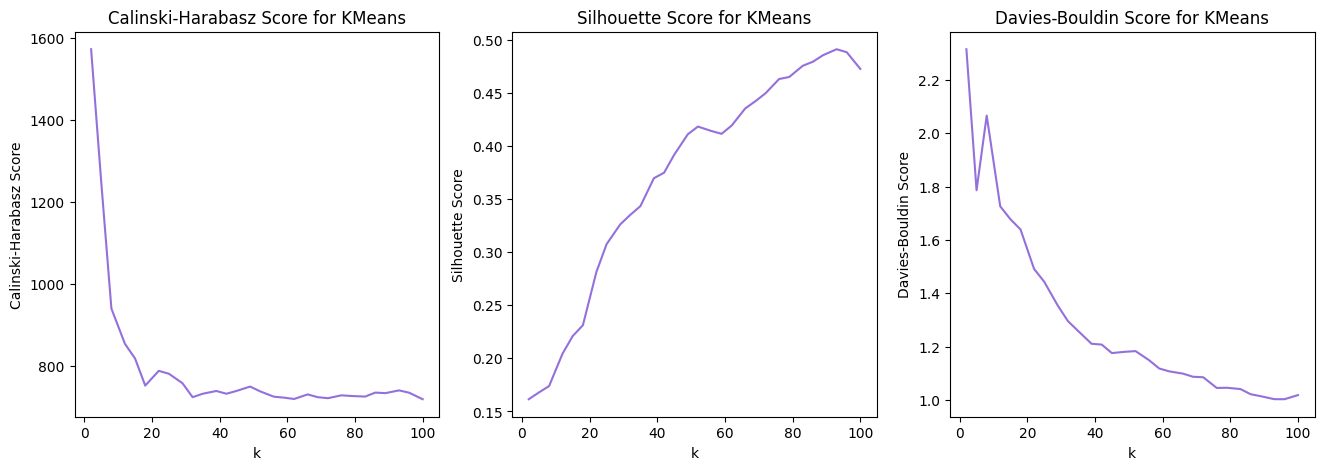

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape Calinski-Harabasz scores to match the meshgrid
calinski_matrix = calinski.reshape((len(k), 1))

# Plotting the Calinski-Harabasz scores as scatter plot
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(k, calinski_matrix, color= 'mediumpurple')
plt.title('Calinski-Harabasz Score for KMeans')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(1, 3, 2)
plt.plot(k, siluette, color= 'mediumpurple')
plt.title('Silhouette Score for KMeans')
plt.xlabel('k')
plt.ylabel('Silhouette Score')


plt.subplot(1, 3, 3)
plt.plot(k, davis, color= 'mediumpurple')
plt.title('Davies-Bouldin Score for KMeans')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.show()


#### Interpreting the results
## Silhouette Score and Davies-Bouldin Index Interpretation

1. **Silhouette Score:**
   - The silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1.
   - **Interpretation:**
      - A score near +1 indicates good matching within the cluster and poor matching to neighboring clusters.
      - A score around 0 suggests overlapping clusters.
      - A score less than 0 may indicate potential misclassification.

2. **Davies-Bouldin Index:**
   - The Davies-Bouldin Index measures the average similarity index of each cluster with the cluster that is most similar to it.
   - **Interpretation:**
      - Lower values (closer to 0) indicate better clustering.
      - Clusters should be well-separated and compact.

**Interpreting Results:**
- High scores in both metrics suggest good clustering with well-defined and separated clusters.
- A high silhouette score but low Davies-Bouldin Index may indicate well-defined clusters with some overlap.
- Low scores in both metrics may suggest unclear or overlapping clusters or inappropriate clustering algorithms.

Always consider domain knowledge and data characteristics when interpreting results. Experiment with different algorithms and parameters for optimal clustering.


### Gaussian scanning

In [ ]:
#do a gaussian scanning of the pca
from sklearn.mixture import GaussianMixture
from sklearn import metrics

# #############################################################################
# Compute GaussianMixture
gm = GaussianMixture(n_components=6, random_state=0).fit(x_pca)
labels_GSS = gm.predict(x_pca)
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_GSS)) - (1 if -1 in labels_GSS else 0)
print("Number of clusters:", n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pca, labels_GSS))


# #############################################################################
# Plot result using plotly
import plotly.express as px
fig = px.scatter_3d(
    x_pca, x = 0, y = 1, z = 2, color=labels, size=0.1*np.ones(len(data_encoded)), opacity = 1, size_max=5,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()



[74 18 43 ...  1 52 80]
Number of clusters: 6
Estimated number of clusters: 6
Silhouette Coefficient: 0.170


In [ ]:
from sklearn.mixture import GaussianMixture

n_components = np.linspace(2, 10, 9)

calinski = []
siluette = []
davis = []

for i in range(len(n_components)):
    gm = GaussianMixture(n_components=int(n_components[i]), random_state=0).fit(x_pca)
    labels = gm.predict(x_pca)
    calinski.append(metrics.calinski_harabasz_score(x_pca, labels))
    siluette.append(metrics.silhouette_score(x_pca, labels))
    davis.append(metrics.davies_bouldin_score(x_pca, labels))
    print(i/n_components.shape[0]*100, '%')

calinski = np.array(calinski)
print(calinski)

siluette = np.array(siluette)
print(siluette)

davis = np.array(davis)
print(davis)



0.0 %
11.11111111111111 %
22.22222222222222 %
33.33333333333333 %
44.44444444444444 %
55.55555555555556 %
66.66666666666666 %
77.77777777777779 %
88.88888888888889 %
[1572.44340919 1398.5652296  1228.03858556 1277.41181902 1192.51095604
 1014.71386351  741.74107522  697.06714848  780.73770152]
[0.16147105 0.16003474 0.16530879 0.1600314  0.16998087 0.16664373
 0.14463537 0.13842935 0.15879562]
[2.31413392 2.12221003 2.12971258 1.76714382 1.84360048 2.5581217
 2.55285736 2.27330421 2.11172439]


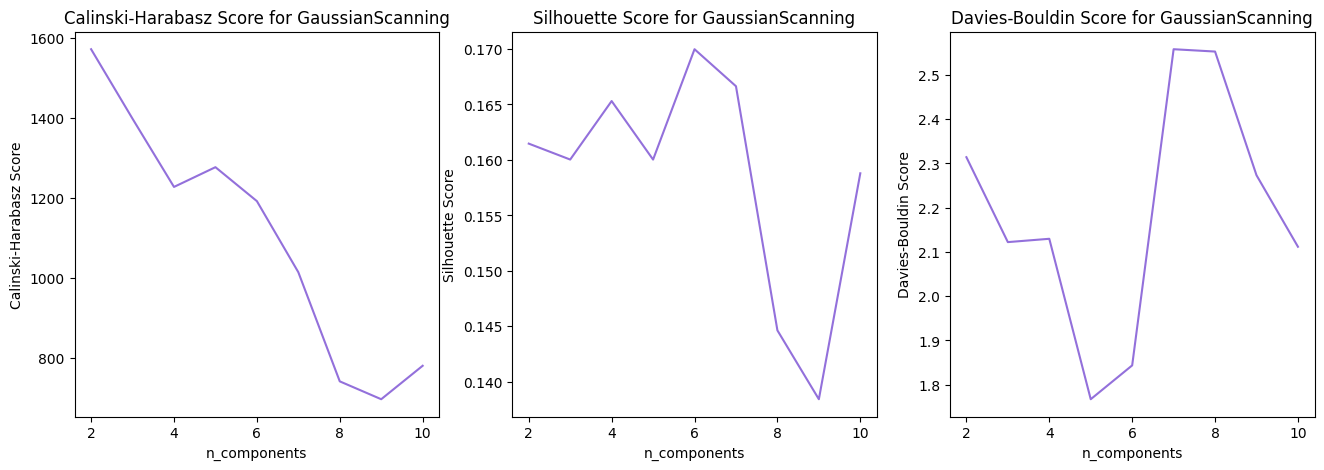

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the Calinski-Harabasz scores as scatter plot
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(n_components, calinski, color= 'mediumpurple')
plt.title('Calinski-Harabasz Score for GaussianScanning')
plt.xlabel('n_components')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(1, 3, 2)
plt.plot(n_components, siluette, color= 'mediumpurple')
plt.title('Silhouette Score for GaussianScanning')
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(n_components, davis, color= 'mediumpurple')
plt.title('Davies-Bouldin Score for GaussianScanning')
plt.xlabel('n_components')
plt.ylabel('Davies-Bouldin Score')
plt.show()


### Agglomerative clustering

In [ ]:
# hierarcical clustering on pca
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# #############################################################################
# Compute AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3).fit(x_pca)
labels_AGG = ac.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_AGG)) - (1 if -1 in labels_AGG else 0)
print("Number of clusters:", n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pca, labels_AGG))


# #############################################################################
# Plot result using plotly
import plotly.express as px

fig = px.scatter_3d(
      x_pca, x = 0, y = 1, z=2, color=labels_AGG, size=0.1*np.ones(len(data_encoded)), opacity = 1, size_max=5,
      title=f'Total Explained Variance: {total_var:.2f}%',
      labels={'0': 'PC 1', '1': 'PC 2'},
      width=800, height=500
      )
fig.show()


[3 6 3 ... 1 3 3]
Number of clusters: 3
Estimated number of clusters: 3
Silhouette Coefficient: 0.182


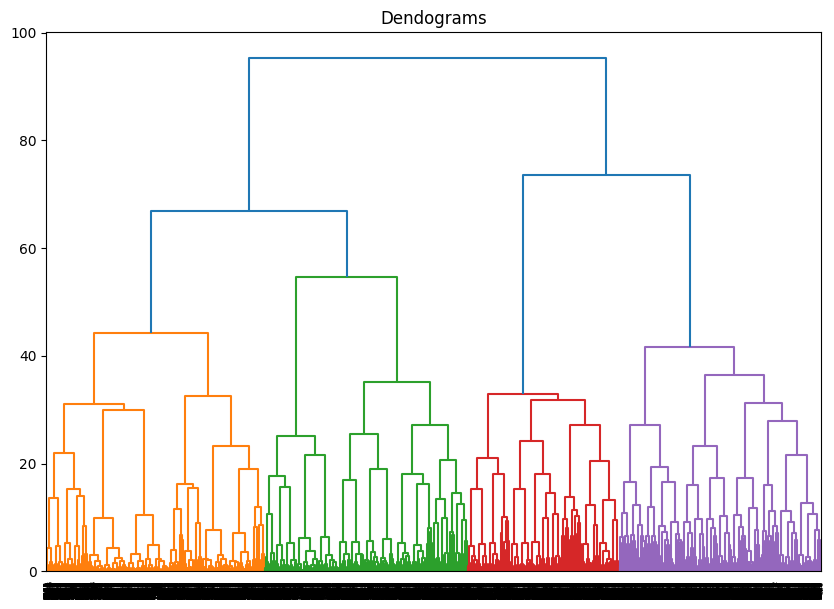

In [ ]:
# Tipical graph of the dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))


In [ ]:
#calculate the silhouette score and calinski harabasz score for the hierarcical clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

n_clusters = np.linspace(2, 10, 9)
siluette = []
calinski = []
davis = []

for i in range(len(n_clusters)):
    ac = AgglomerativeClustering(n_clusters=int(n_clusters[i])).fit(x_pca)
    labels = ac.labels_
    siluette.append(metrics.silhouette_score(x_pca, labels));
    calinski.append(metrics.calinski_harabasz_score(x_pca, labels));
    davis.append(metrics.davies_bouldin_score(x_pca, labels));
    print(i/n_clusters.shape[0]*100, '%')

siluette = np.array(siluette)
print(siluette)

calinski = np.array(calinski)
print(calinski)

davis = np.array(davis)
print(davis)

0.0 %
11.11111111111111 %
22.22222222222222 %
33.33333333333333 %
44.44444444444444 %
55.55555555555556 %
66.66666666666666 %
77.77777777777779 %
88.88888888888889 %
[0.1614832  0.18158213 0.1702682  0.17137348 0.16041256 0.1678575
 0.16900318 0.17717431 0.1825076 ]
[1508.81164029 1344.12144886 1296.12712525 1210.55389842 1109.78077657
 1040.55528883  974.61109337  925.18382411  882.81037326]
[2.37753537 1.98533579 2.02420201 1.80583548 1.80835448 1.92786763
 1.91545978 1.95711572 2.01445655]


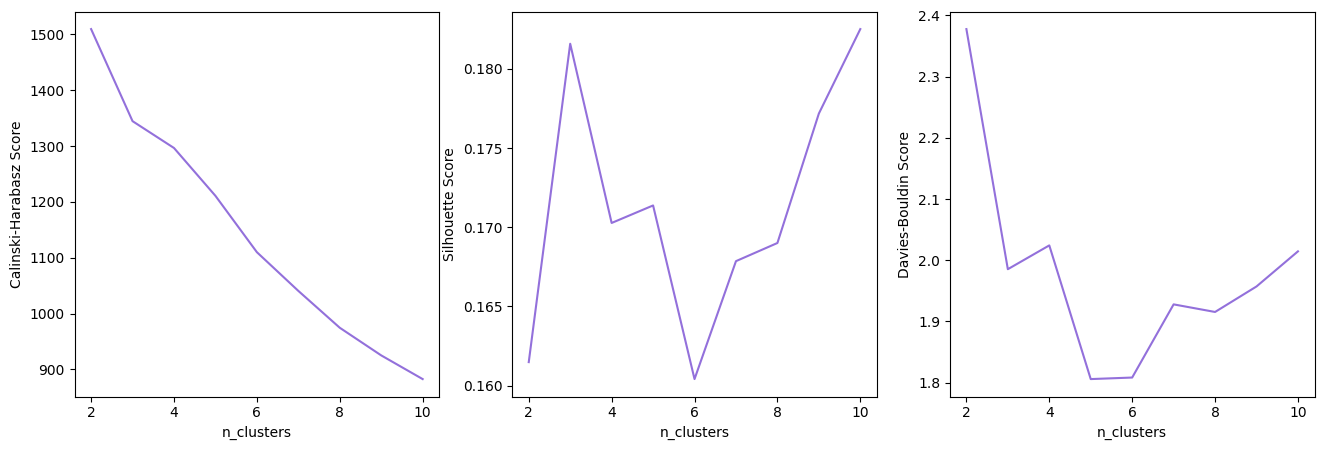

In [ ]:
#plot the silhouette score and calinski harabasz score for the hierarcical clustering
import matplotlib.pyplot as plt
import numpy as np

# Plotting the Calinski-Harabasz scores as scatter plot
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(n_clusters, calinski, color= 'mediumpurple')
plt.xlabel('n_clusters')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(1, 3, 2)
plt.plot(n_clusters, siluette, color= 'mediumpurple')
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(n_clusters, davis, color= 'mediumpurple')
plt.xlabel('n_clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()



## External Index Evaluation

Here we would like to compare our clustering results with the true label of the dataset, which were 'Transported' and 'Not Transported'.


### K-Means

In [ ]:
#compare label with label_KMN using Adjusted Rand Index
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(label, labels_KMN)

0.022953613110531994

The adjusted rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization. Since we got 0.02 we can say that the two assignments are not similar at all, so the clustering algorithm did not perform well.
But what if we change the number of clusters in our clustering algorithm? 

[6 2 3 ... 0 7 3]
Number of clusters: 3
Estimated number of clusters: 3
Silhouette Coefficient: 0.183


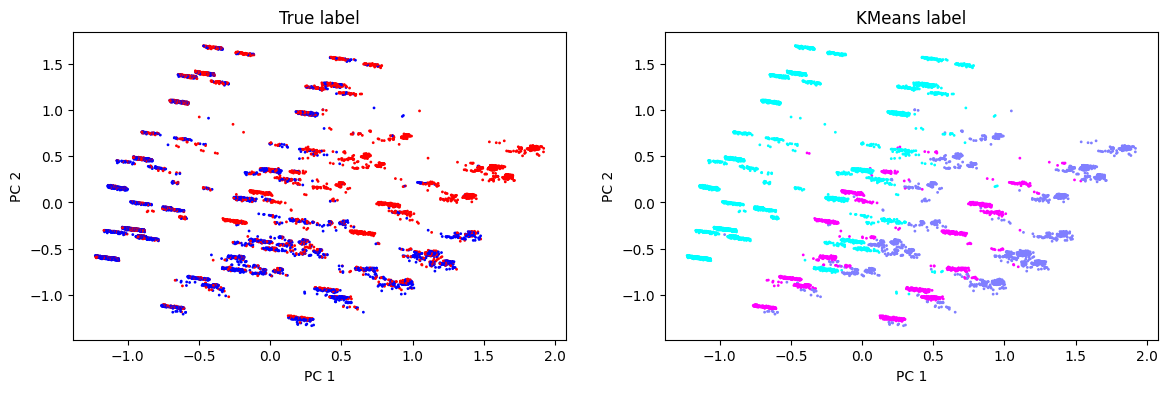

In [ ]:
# cluster the data using KMeans, the pca data
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Compute KMeans
km = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(x_pca)
labels_KMN = km.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_KMN)) - (1 if -1 in labels_KMN else 0)
print("Number of clusters:", n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pca, labels))


# #############################################################################
#plot subplots in 2d the fist component of the pcs but on the left with the true label, on the right with the label_KMN
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].scatter(x_pca[0], x_pca[1], c=label, s=1 , cmap='bwr')
axes[0].set_title('True label')
axes[0].set_xlabel('PC 1')
axes[0].set_ylabel('PC 2')

axes[1].scatter(x_pca[0], x_pca[1], c=labels_AGG, s=1, cmap='cool')
axes[1].set_title('KMeans label')
axes[1].set_xlabel('PC 1')
axes[1].set_ylabel('PC 2')

plt.show()


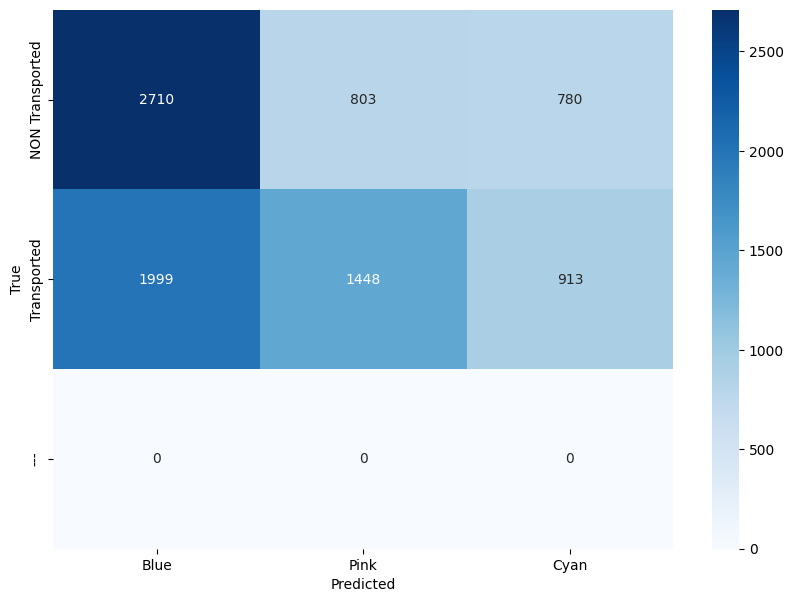

In [ ]:
# compute cofusion matrix using the labels of the cluster and the true labels
from sklearn.metrics import confusion_matrix
confusion_matrix(label, labels)

#plot the confusion matrix
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(label, labels_AGG), annot=True, cmap='Blues', fmt='g')
# change label xticks
plt.xticks(np.arange(0.5,3.5,1), ('Blue', 'Pink', 'Cyan'))
plt.yticks(np.arange(0.5,3.5,1), ('NON Transported', 'Transported', '---'))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()